In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_data = pd.read_excel('DataSet.xlsx')

In [3]:
insurance_data.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


In [4]:
data = insurance_data.copy()

In [5]:
data = data.iloc[:,:-1]
data['SumTotalClaimAmount'].fillna(0, inplace=True)
data['CountTotalClaimAmount'].fillna(0, inplace=True)

In [9]:
data.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount
0,10806273,NaN,0.0,0.0,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0
1,10822247,NaN,0.0,0.0,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0
2,10941976,NaN,0.0,0.0,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0
3,10782539,NaN,0.0,0.0,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0
4,10916477,NaN,0.0,0.0,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0


## **Gender**

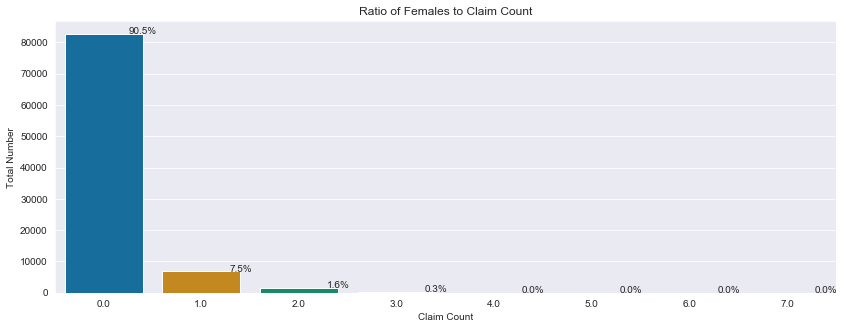

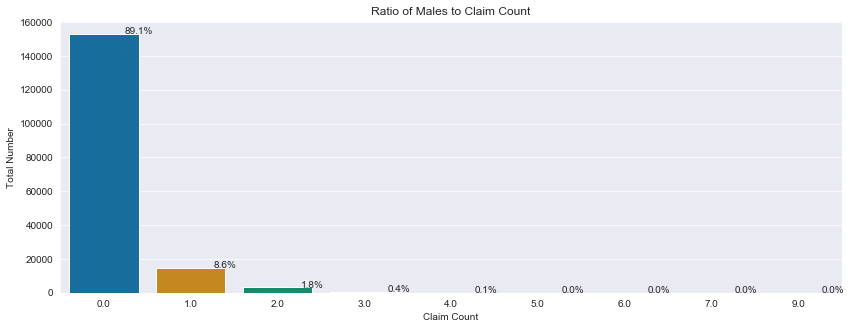

In [61]:
#Female vs Claim COunt
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['Gender']=='Female'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['Gender']=='Female']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center')
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Females to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['Gender']=='Male'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['Gender']=='Male']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Males to Claim Count')
plt.show()

## **Marital Status**

In [24]:
data['MaritalStatus'].value_counts()

Single      133594
Married     113017
Divorced     11076
Widowed       5297
Name: MaritalStatus, dtype: int64

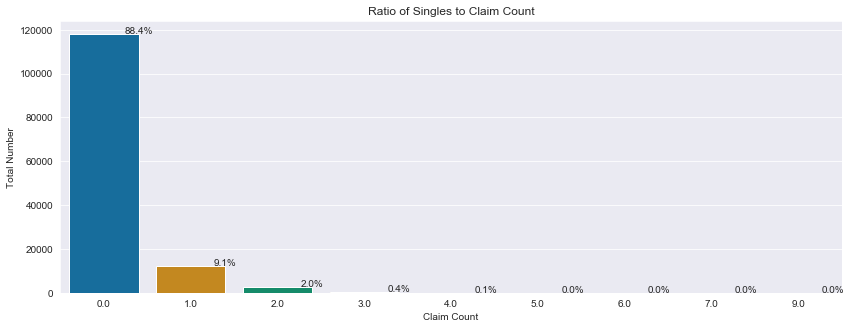

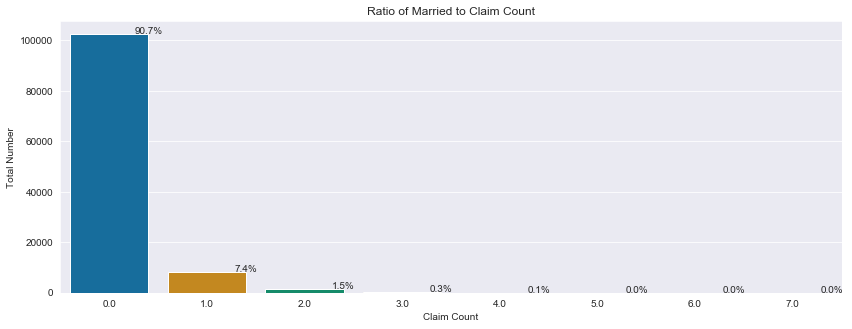

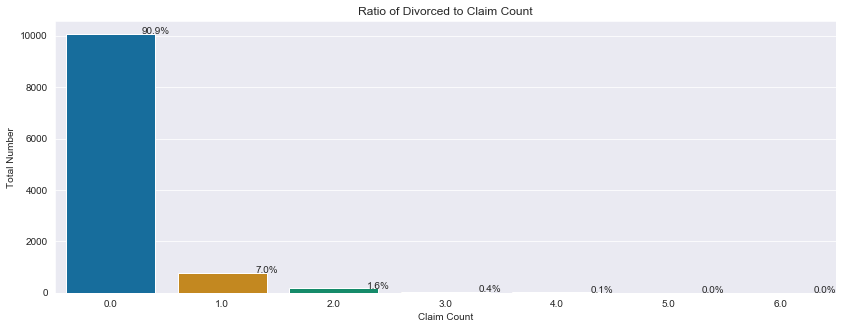

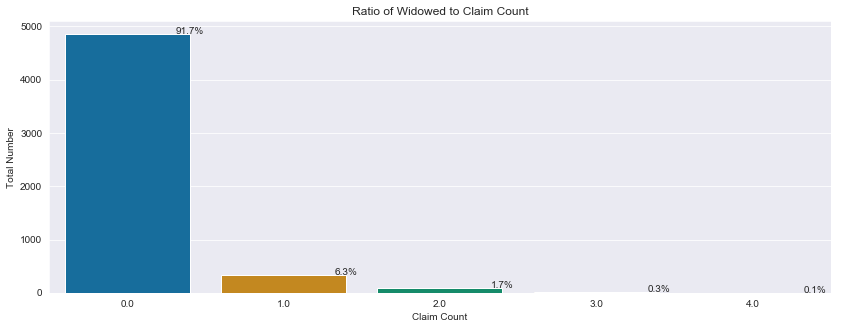

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['MaritalStatus']=='Single'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['MaritalStatus']=='Single']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Singles to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['MaritalStatus']=='Married'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['MaritalStatus']=='Married']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Married to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['MaritalStatus']=='Divorced'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['MaritalStatus']=='Divorced']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Divorced to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['MaritalStatus']=='Widowed'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['MaritalStatus']=='Widowed']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Widowed to Claim Count')
plt.show()

In [41]:
data['VehicleType'].value_counts()

Auto                238214
Light Commercial     24770
Name: VehicleType, dtype: int64

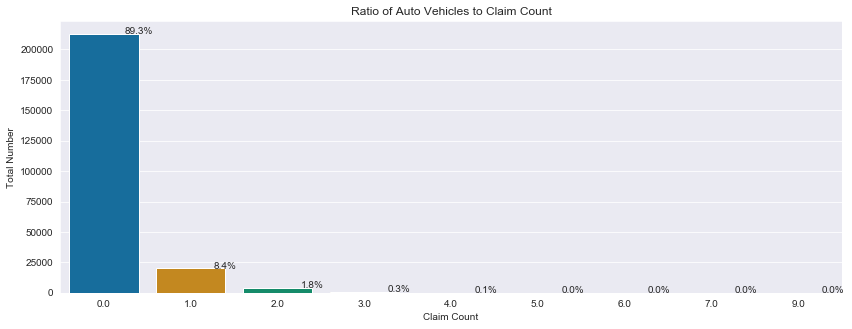

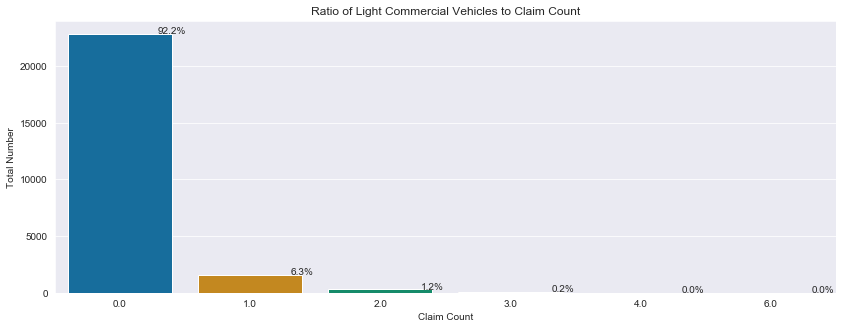

In [63]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['VehicleType']=='Auto'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['VehicleType']=='Auto']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Auto Vehicles to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['VehicleType']=='Light Commercial'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['VehicleType']=='Light Commercial']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Light Commercial Vehicles to Claim Count')
plt.show()

In [45]:
data['Transmission'].value_counts()

M    207187
A     55797
Name: Transmission, dtype: int64

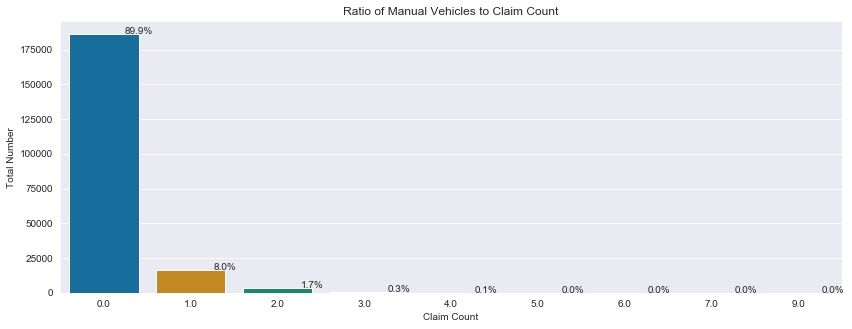

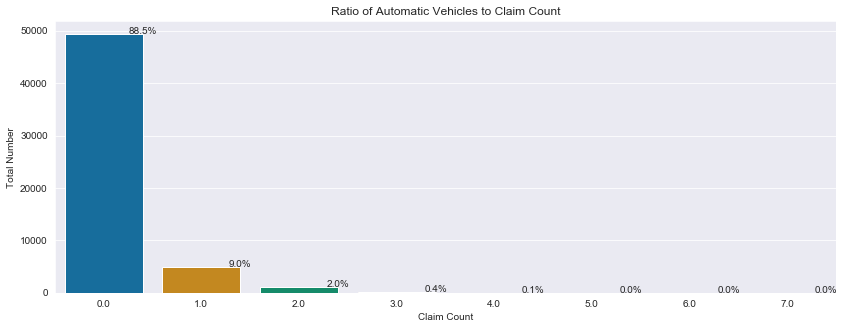

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['Transmission']=='M'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['Transmission']=='M']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Manual Vehicles to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['Transmission']=='A'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['Transmission']=='A']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Automatic Vehicles to Claim Count')
plt.show()

In [48]:
data['PersonProvince'].value_counts()

GAUTENG          107988
KWAZULU-NATAL     47491
MPUMALANGA        20007
EASTERN CAPE      19227
LIMPOPO           19193
WESTERN CAPE      17302
NORTH WEST        15914
FREE STATE        10547
NORTHERN CAPE      5315
Name: PersonProvince, dtype: int64

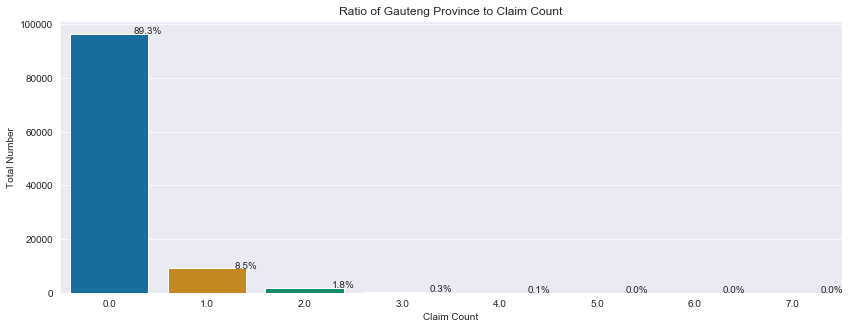

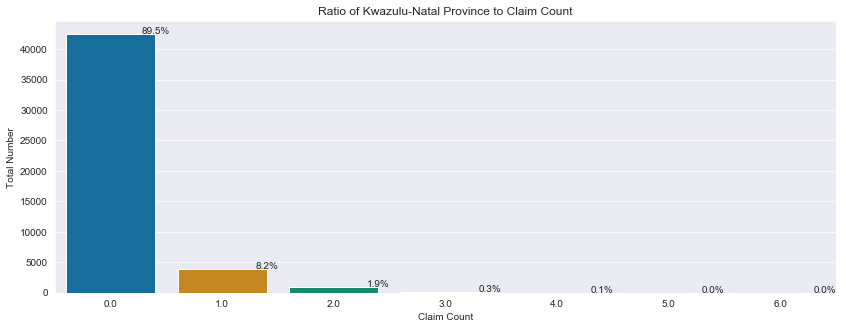

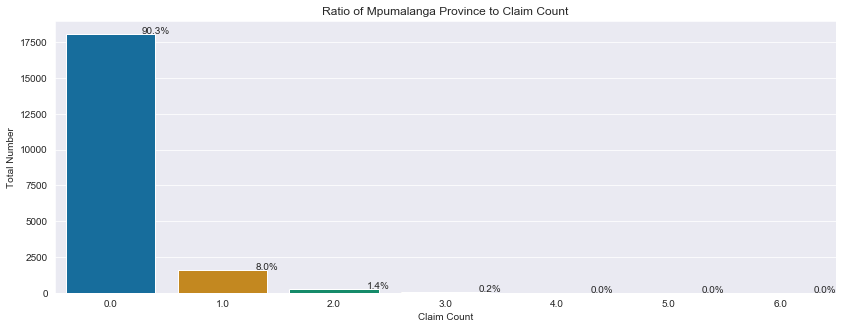

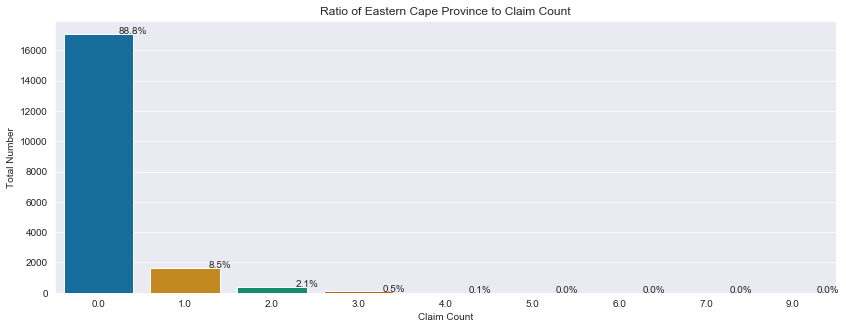

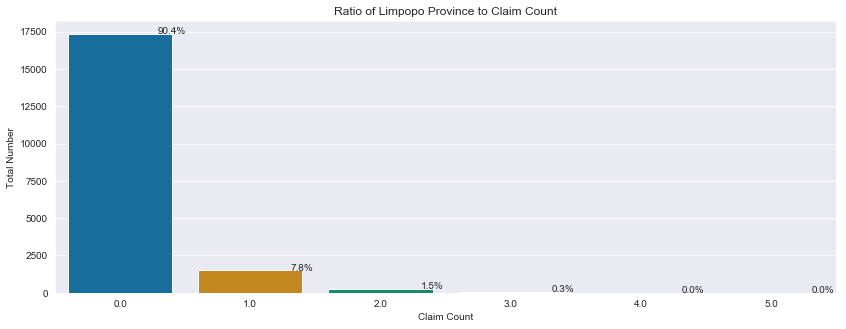

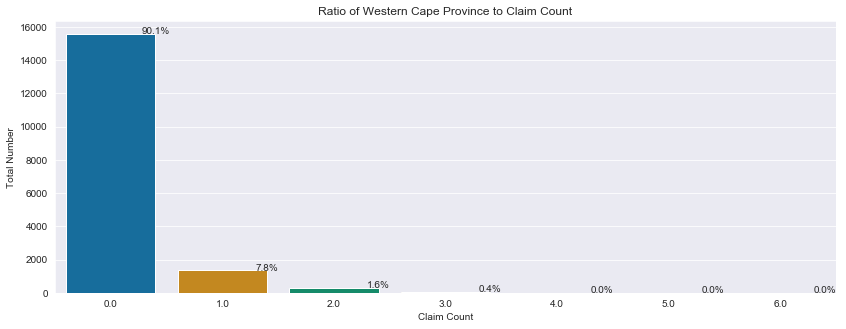

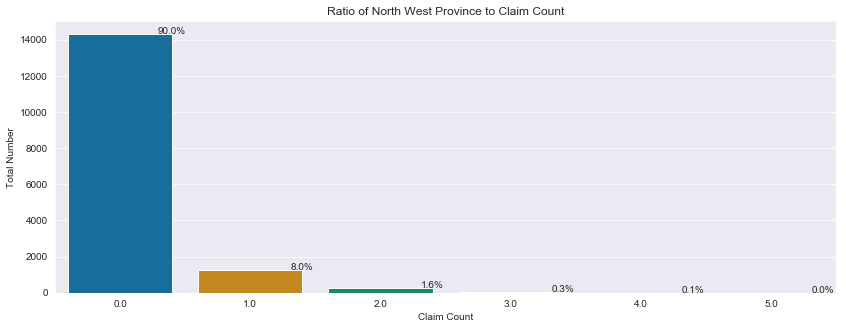

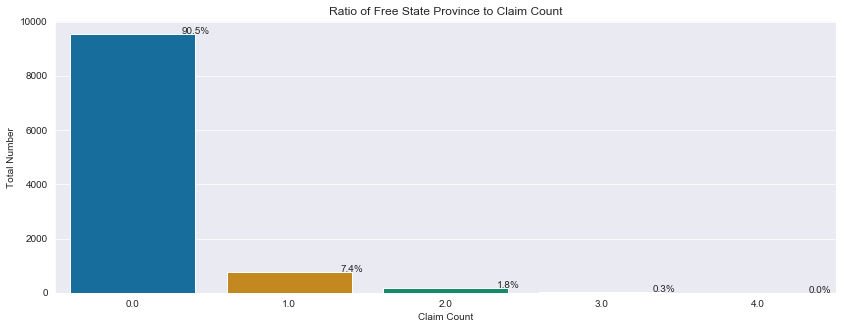

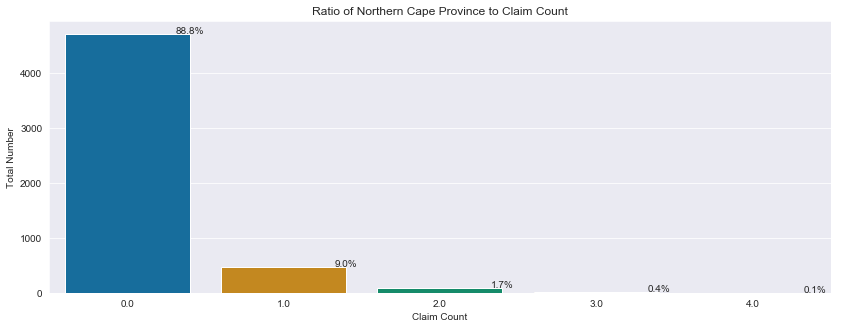

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='GAUTENG'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='GAUTENG']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Gauteng Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='KWAZULU-NATAL'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='KWAZULU-NATAL']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Kwazulu-Natal Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='MPUMALANGA'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='MPUMALANGA']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Mpumalanga Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='EASTERN CAPE'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='EASTERN CAPE']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Eastern Cape Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='LIMPOPO'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='LIMPOPO']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Limpopo Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='WESTERN CAPE'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='WESTERN CAPE']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Western Cape Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='NORTH WEST'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='NORTH WEST']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of North West Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='FREE STATE'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='FREE STATE']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Free State Province to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PersonProvince']=='NORTHERN CAPE'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PersonProvince']=='NORTHERN CAPE']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Northern Cape Province to Claim Count')
plt.show()

In [67]:
data['PolicyStatus'].value_counts()

Active       113661
Cancelled     71636
Lapsed        63158
Pending       14529
Name: PolicyStatus, dtype: int64

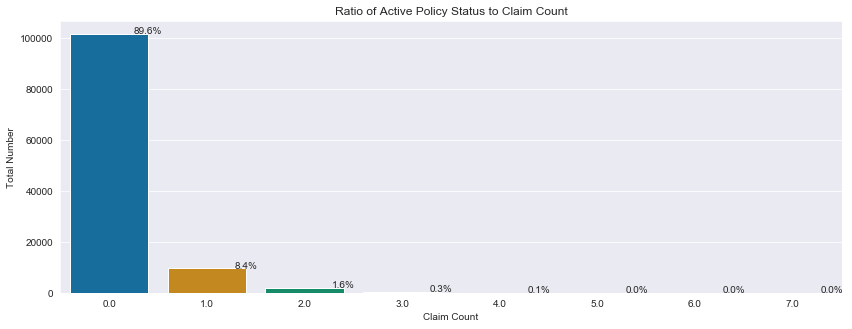

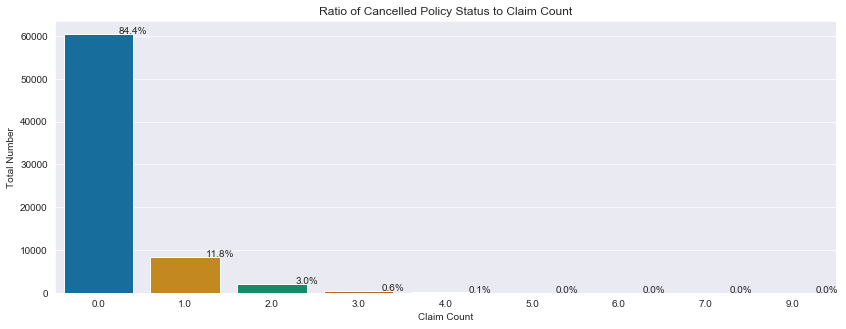

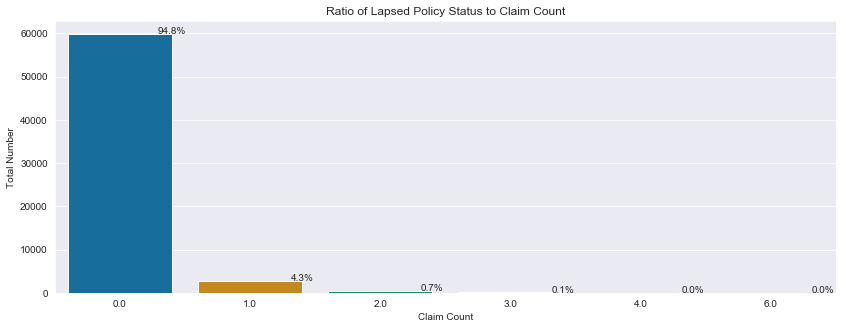

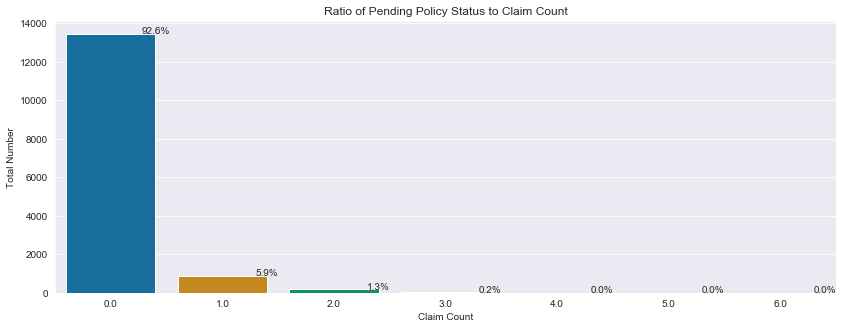

In [70]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PolicyStatus']=='Active'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PolicyStatus']=='Active']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Active Policy Status to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PolicyStatus']=='Cancelled'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PolicyStatus']=='Cancelled']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Cancelled Policy Status to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PolicyStatus']=='Lapsed'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PolicyStatus']=='Lapsed']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Lapsed Policy Status to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['PolicyStatus']=='Pending'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['PolicyStatus']=='Pending']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Pending Policy Status to Claim Count')
plt.show()

In [76]:
data['EmploymentType'].value_counts()

Permanent             220552
Self-Employed          18943
Temporary / Casual      6889
Retired                 5770
Unemployed              4286
Part-time               3705
Commission Earner        189
Name: EmploymentType, dtype: int64

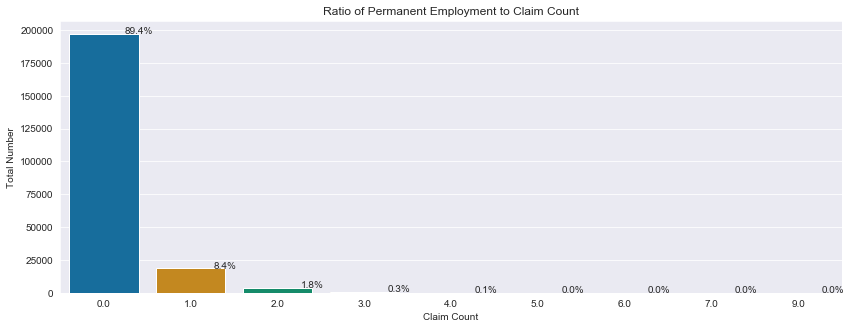

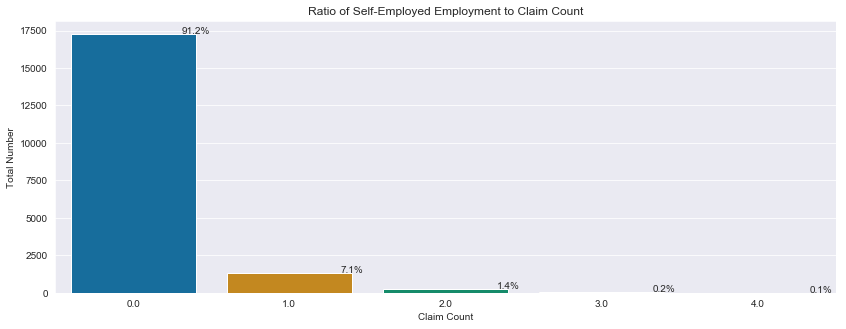

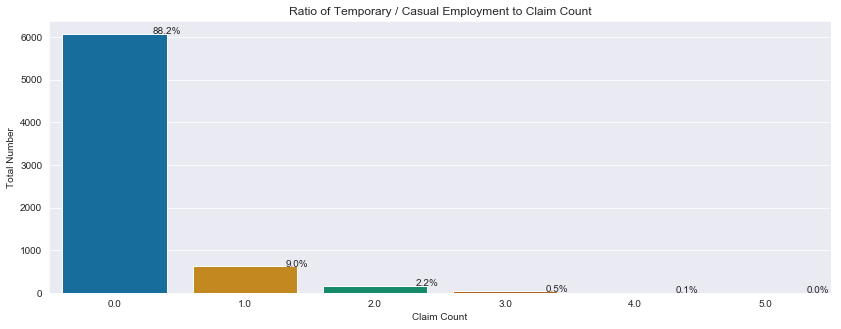

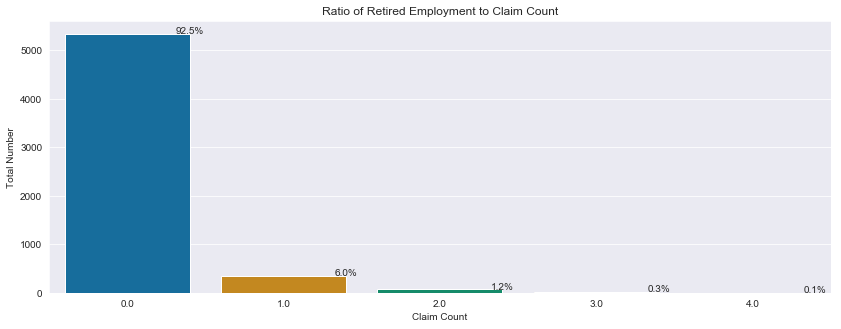

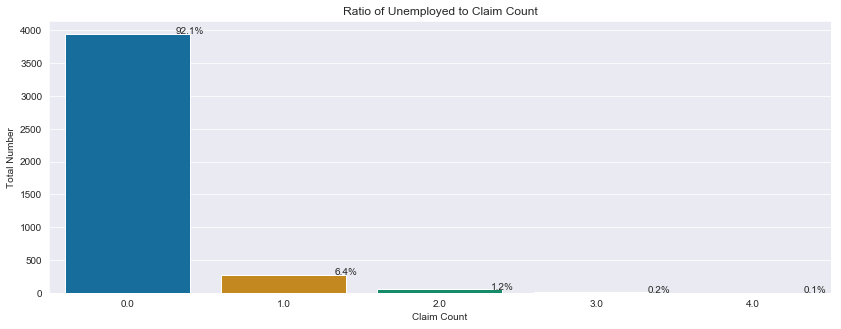

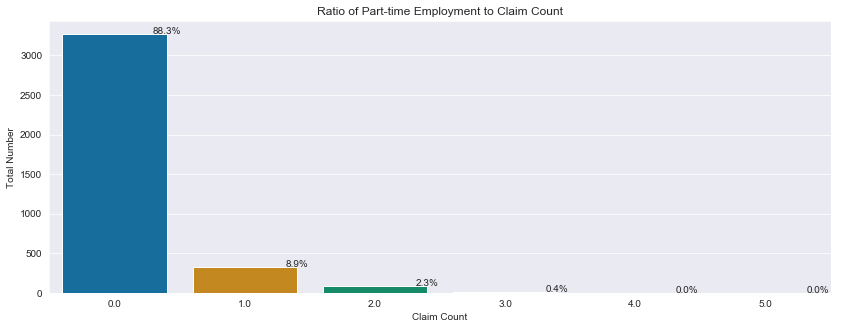

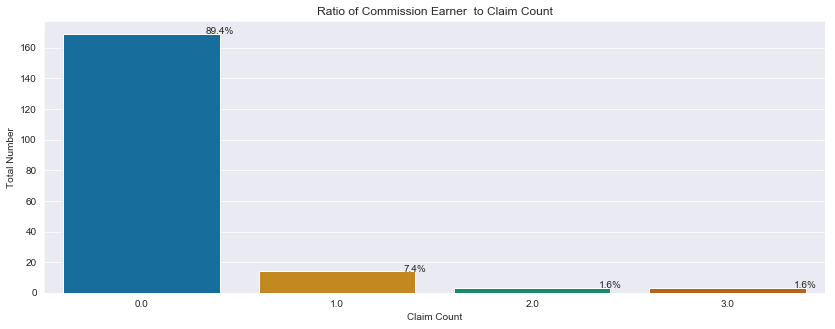

In [78]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Permanent'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Permanent']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Permanent Employment to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Self-Employed'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Self-Employed']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Self-Employed Employment to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Temporary / Casual'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Temporary / Casual']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Temporary / Casual Employment to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Retired'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Retired']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Retired Employment to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Unemployed'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Unemployed']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Unemployed to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Part-time'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Part-time']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Part-time Employment to Claim Count')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['EmploymentType']=='Commission Earner'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data[data['EmploymentType']=='Commission Earner']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Commission Earner  to Claim Count')
plt.show()

In [79]:
data['EmploymentType'].value_counts()

Permanent             220552
Self-Employed          18943
Temporary / Casual      6889
Retired                 5770
Unemployed              4286
Part-time               3705
Commission Earner        189
Name: EmploymentType, dtype: int64

In [80]:
Gender = data['Gender'].value_counts()
perc1 = Gender/Gender.sum()*100
gen_sum = Gender.sum()
print(gen_sum)
print(perc1)
Gender

262982
Male      65.282795
Female    34.717205
Name: Gender, dtype: float64


Male      171682
Female     91300
Name: Gender, dtype: int64

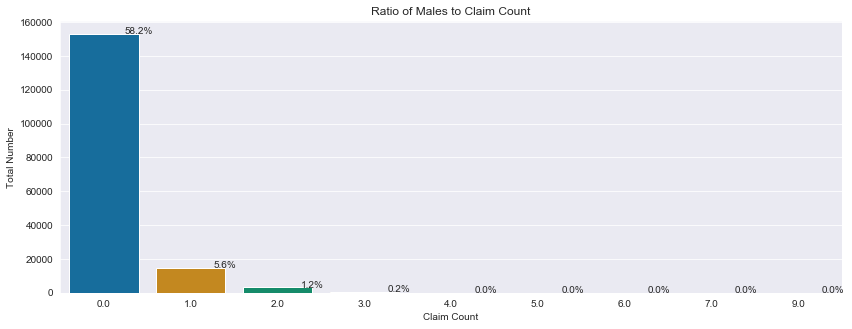

In [81]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5))
ax = sns.countplot(data=data[data['Gender']=='Male'], x='CountTotalClaimAmount', palette='colorblind')
total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y), ha='center',)
plt.xlabel('Claim Count')
plt.ylabel('Total Number')
plt.title('Ratio of Males to Claim Count')
plt.show()